<a href="https://www.kaggle.com/code/yousefmoterassed/brazil-official-car-sales-records-1990-2022?scriptVersionId=106581495" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="width:100%;text-align: center;color:darkblue;font-size:45px">  Brazil Car Sales (1990-2022) </div>
 
    
*Author: Yousef Moterassed*  
*September 2022*
  
***

In this notebook I am trying to present a simple analysis for the car sales records in Brazil for the last 32 years. I am using this [**dataset**](../input/brazil-car-sales-records-from-1990-to-2022) which containts monthly car sales data in Brazil from January 1990 to the August 2022.

# Process

First we will have a review of our dataset and see what do we have inside it.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import os
print(os.listdir("../input/"))

df=pd.read_csv('../input/brazil-car-sales-records-from-1990-to-2022/dados.csv')
df.head()

['brazil-car-sales-records-from-1990-to-2022']


,Date,Value
0,"01,01,1990",69792
1,"01,02,1990",57258
2,"01,03,1990",32740
3,"01,04,1990",32812
4,"01,05,1990",58464


Then we want to check the statistical information about our values.

In [2]:
df.describe(include='all')

,Date,Value
count,392,392.000000
unique,392,NaN
top,"01,01,1990",NaN
freq,1,NaN
mean,NaN,174291.352041
std,NaN,77479.206011
min,NaN,32740.000000
25%,NaN,120580.250000
50%,NaN,157620.500000
75%,NaN,223643.250000


And verify if there is any null values, and see how many rows it contains.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    392 non-null    object
 1   Value   392 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.2+ KB


# Transformation

It seems that the Date format is in Brazilian standard, so we will transform it to the python standard

In [4]:
df['Date']= pd.to_datetime(df['Date'], format='%d,%m,%Y')
df.head()

,Date,Value
0,1990-01-01,69792
1,1990-02-01,57258
2,1990-03-01,32740
3,1990-04-01,32812
4,1990-05-01,58464


# Analysis

Now lets have a quick look at the sales trend during the years in Brazil

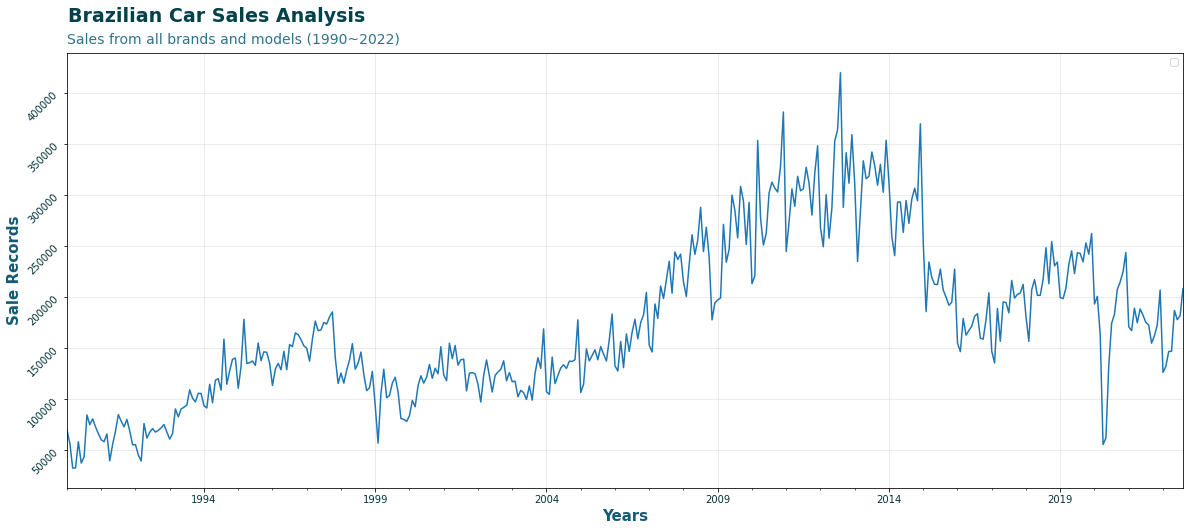

In [5]:
# Ploting the sales trend in Brazil
df.plot(kind='line', x='Date', y='Value', figsize=(20, 8))
plt.grid(alpha=0.3)


# Rotating the labels for readability
plt.xticks(rotation=0, color='#01323A')
plt.yticks(rotation=45, color='#01323A')

# Adding title, subtitle, labels and legends for easier and faster understanding
plt.title(
    "Sales from all brands and models (1990~2022)",
    fontsize=14,
    pad=10,
    loc="left",
    color='#2F748E'
)

plt.suptitle(
    "Brazilian Car Sales Analysis",
    fontsize=19,
    fontweight='bold',
    x=0.126,
    y=0.96,
    ha="left",
    color='#03414C'
)
plt.xlabel('Years', 
           fontsize=15,
          fontweight='bold',
          color='#145B75')
plt.ylabel('Sale Records',
          fontsize=15,
          fontweight='bold',
          color='#145B75')
plt.legend('', frameon=None)

The trend shows us a strong sales increase from 2000 to 2012 and a decrease by 2014 to 2020. Then there is a dramatic sale records drop between 2020 and 2021 which was recovered by late 2021 and early 2022. 

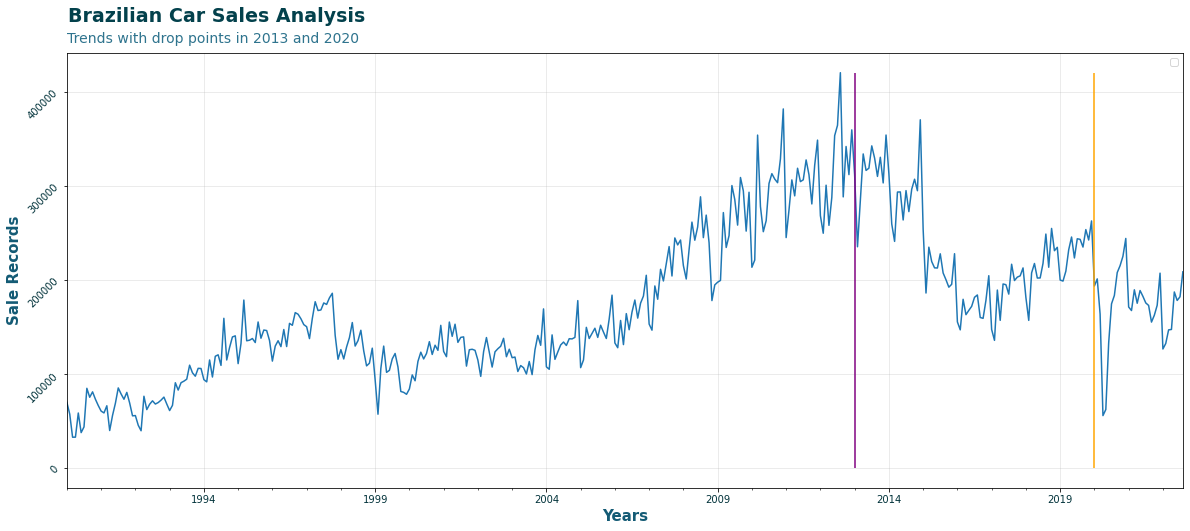

In [6]:
df.plot(kind='line', x='Date', y='Value', figsize=(20, 8))
plt.grid(alpha=0.3)
plt.vlines(x = '2013', ymin = 0, ymax = max(df['Value']), colors = 'purple',label='Drop point')
plt.vlines(x = '2020', ymin = 0, ymax = max(df['Value']), colors = 'orange',label='Second Drop')

# Rotating the labels for readability
plt.xticks(rotation=0, color='#01323A')
plt.yticks(rotation=45, color='#01323A')

# Adding title, subtitle, labels and legends for easier and faster understanding
plt.title(
    "Trends with drop points in 2013 and 2020",
    fontsize=14,
    pad=10,
    loc="left",
    color='#2F748E'
)

plt.suptitle(
    "Brazilian Car Sales Analysis",
    fontsize=19,
    fontweight='bold',
    x=0.126,
    y=0.96,
    ha="left",
    color='#03414C'
)
plt.xlabel('Years', 
           fontsize=15,
          fontweight='bold',
          color='#145B75')
plt.ylabel('Sale Records',
          fontsize=15,
          fontweight='bold',
          color='#145B75')
plt.legend('', frameon=None)

## Average Automobile Sales in Brazil

Also we want to know what is the average car sale for Brazil considering all the sales history for this market. We know that the 50th percentile for this dataset is:
`mean.df['Value']`  
  **`174291.352041`**
  
So let's add a horizontal line to see how the trend is moving around the average sales.

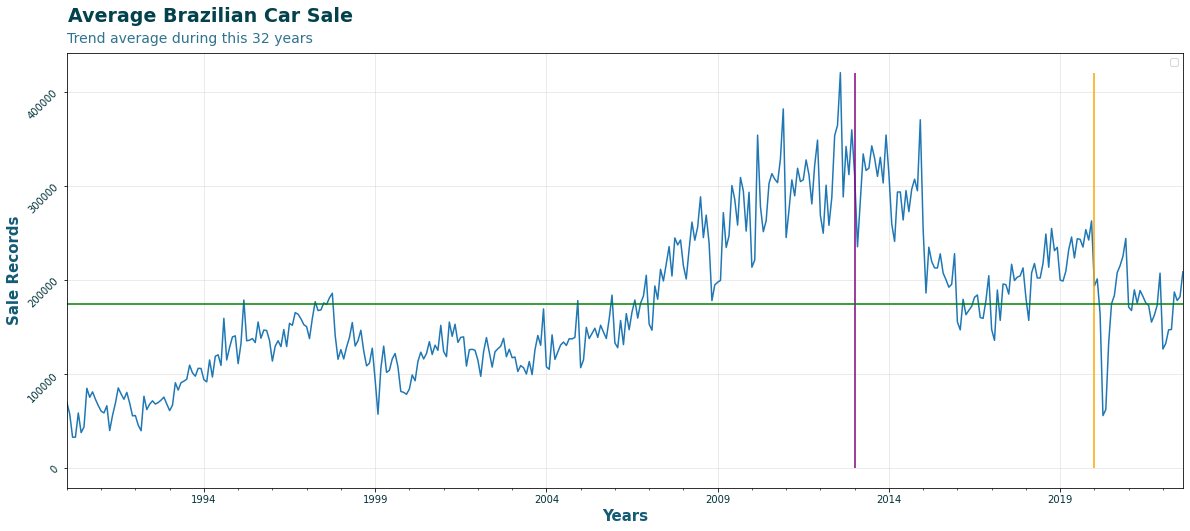

In [7]:
df.plot(kind='line', x='Date', y='Value', figsize=(20, 8))
plt.grid(alpha=0.3)
plt.vlines(x = '2013', ymin = 0, ymax = max(df['Value']), colors = 'purple')
plt.vlines(x = '2020', ymin = 0, ymax = max(df['Value']), colors = 'orange')
plt.axhline(y= 174291.352041, color='green', label='mean')

# Rotating the labels for readability
plt.xticks(rotation=0, color='#01323A')
plt.yticks(rotation=45, color='#01323A')

# Adding title, subtitle, labels and legends for easier and faster understanding
plt.title(
    "Trend average during this 32 years",
    fontsize=14,
    pad=10,
    loc="left",
    color='#2F748E'
)

plt.suptitle(
    "Average Brazilian Car Sale",
    fontsize=19,
    fontweight='bold',
    x=0.126,
    y=0.96,
    ha="left",
    color='#03414C'
)
plt.xlabel('Years', 
           fontsize=15,
          fontweight='bold',
          color='#145B75')
plt.ylabel('Sale Records',
          fontsize=15,
          fontweight='bold',
          color='#145B75')
plt.legend('', frameon=None)

## Sales Trends of 2022

Now that we know what happened in the history of the sales, let's see the changes of sales for the present year (2022) until August.

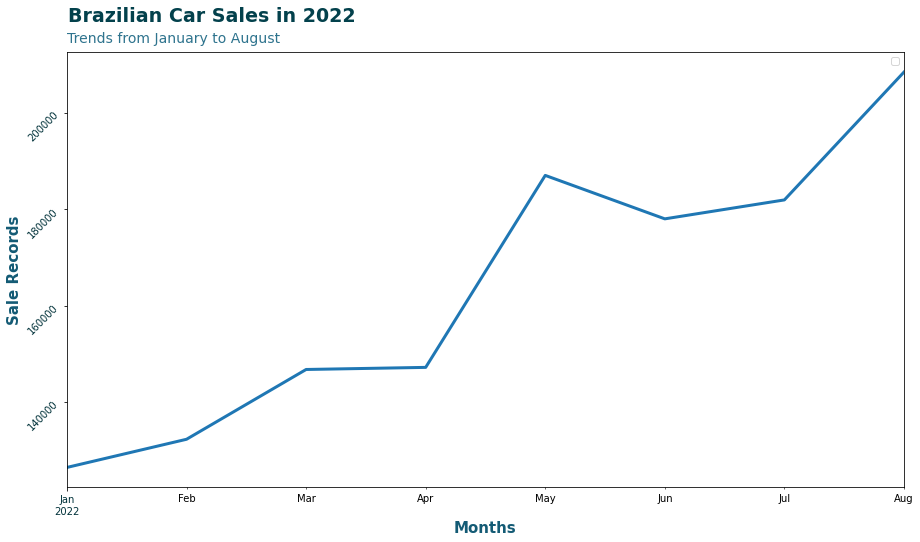

In [8]:
# Plot for this year sales
# Defining the begining and the end
start_date = "2022-1-1"
end_date = "2022-08-01"

#Defining the period
after_start_date = df["Date"] >= start_date
before_end_date = df["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = df.loc[between_two_dates]

# Ploting this year trend
filtered_dates.plot(kind='line', x='Date', y='Value', figsize=(15,8), linewidth=3)

# Rotating the labels for readability
plt.xticks(rotation=0, color='#01323A')
plt.yticks(rotation=45, color='#01323A')

# Adding title, subtitle, labels and legends for easier and faster understanding
plt.title(
    "Trends from January to August",
    fontsize=14,
    pad=10,
    loc="left",
    color='#2F748E'
)

plt.suptitle(
    "Brazilian Car Sales in 2022",
    fontsize=19,
    fontweight='bold',
    x=0.126,
    y=0.96,
    ha="left",
    color='#03414C'
)
plt.xlabel('Months', 
           fontsize=15,
          fontweight='bold',
          color='#145B75')
plt.ylabel('Sale Records',
          fontsize=15,
          fontweight='bold',
          color='#145B75')
plt.legend('', frameon=None)

## Covid-19 Era and its effects on the market

This is very interesting since the market is obviously moving up to have a strong sale records for this year. Now let's see what happened after covid pandemic and what was the effect of it to the car sales.

According to [Wikipedia](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Brazil) the arrival date has been recorded officially on February 2020, so we will set our analysis by this date and see the changes.

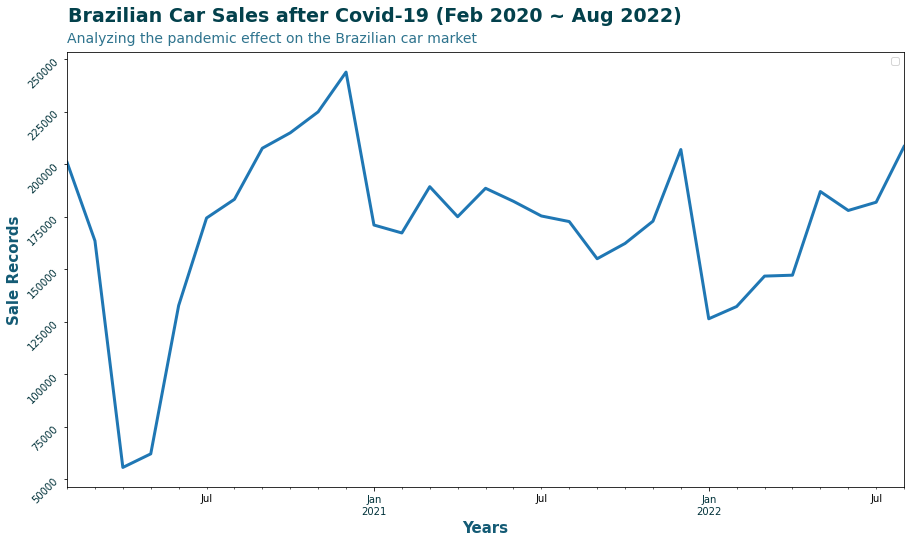

In [9]:
# Plot for covid era
# Defining the begining and the end
start_covid = "2020-2-1"
end_covid = "2022-08-01"

#Defining the period
after_covid = df["Date"] >= start_covid
before_covid = df["Date"] <= end_covid
between_covid = after_covid & before_covid
filtered_covid_date = df.loc[between_covid]

#Ploting the filtered data
filtered_covid_date.plot(kind='line', x='Date', y='Value', figsize=(15,8), linewidth=3)

# Rotating the labels for readability
plt.xticks(rotation=0, color='#01323A')
plt.yticks(rotation=45, color='#01323A')

# Adding title, subtitle, labels and legends for easier and faster understanding
plt.title(
    "Analyzing the pandemic effect on the Brazilian car market",
    fontsize=14,
    pad=10,
    loc="left",
    color='#2F748E'
)

plt.suptitle(
    "Brazilian Car Sales after Covid-19 (Feb 2020 ~ Aug 2022)",
    fontsize=19,
    fontweight='bold',
    x=0.126,
    y=0.96,
    ha="left",
    color='#03414C'
)
plt.xlabel('Years', 
           fontsize=15,
          fontweight='bold',
          color='#145B75')
plt.ylabel('Sale Records',
          fontsize=15,
          fontweight='bold',
          color='#145B75')
plt.legend('', frameon=None)

# Conclusion

It seems that after covid arrival there was a huge drop for car sales in which began recovering until December 2021, and then again began slightly decreasing for a year until January this year 2022.

By January 2022 the sales again began increasing due to the multiple elements such as decreasing domestic taxes and gas prices, together with launching major companies new models with higher qualities and technologies, also an slight drop of inflation and gdp improvement.

This project has been done by [Yousef Moterassed](https://www.kaggle.com/yousefmoterassed) due to my curiosity , and is available through [Kaggle](https://www.kaggle.com/yousefmoterassed), [GitHub](https://github.com/Persabras), [my website](https://yousefmoterassed.wixsite.com/profile) and [LinkedIn](https://www.linkedin.com/in/yousef-moterassed/).

With all the love and respect
***
[**Yousef Moterassed**](https://www.kaggle.com/yousefmoterassed)  
  August 2022, Brazil  
  [LinkedIn](https://www.linkedin.com/in/yousef-moterassed/)